# Plot

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import sys
sys.path.append('../')
from auxPlots import getInfo, getDistributions,getLHEevents,getATLASdistributions

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [4]:
files = list(glob.glob('../../processFolders/*_scan/Events/*/unweighted_events.lhe.gz'))
smFiles = list(glob.glob('../../processFolders/sm_tt_lo/Events/*/unweighted_events.lhe.gz'))


In [5]:
# Get info
fileData = {f : getInfo(f) for f in files+smFiles}
# Set SM model by hand:

allModels = sorted(list(set([info['model'] for info in fileData.values()])))
allPars = sorted(list(set([info['(mST,mChi,mT,yDM)'] for info in fileData.values()])))
allProcesses = sorted(list(set([info['process'] for info in fileData.values()])))
print(allModels)
print(allPars)
print(allProcesses)

['1-loop', 'SM']
[(300.0, 5.0, 172.5, 1.0), (300.0, 50.0, 172.5, 1.0), (300.0, 100.0, 172.5, 1.0), (300.0, 150.0, 172.5, 1.0), (300.0, 200.0, 172.5, 1.0), (300.0, 225.0, 172.5, 1.0), (300.0, 250.0, 172.5, 1.0), (300.0, 275.0, 172.5, 1.0), (300.0, 290.0, 172.5, 1.0), (400.0, 5.0, 172.5, 1.0), (400.0, 50.0, 172.5, 1.0), (400.0, 100.0, 172.5, 1.0), (400.0, 150.0, 172.5, 1.0), (400.0, 200.0, 172.5, 1.0), (400.0, 250.0, 172.5, 1.0), (400.0, 300.0, 172.5, 1.0), (400.0, 325.0, 172.5, 1.0), (400.0, 350.0, 172.5, 1.0), (400.0, 375.0, 172.5, 1.0), (400.0, 390.0, 172.5, 1.0), (500.0, 5.0, 172.5, 1.0), (500.0, 50.0, 172.5, 1.0), (500.0, 100.0, 172.5, 1.0), (500.0, 150.0, 172.5, 1.0), (500.0, 200.0, 172.5, 1.0), (500.0, 250.0, 172.5, 1.0), (500.0, 300.0, 172.5, 1.0), (500.0, 350.0, 172.5, 1.0), (500.0, 400.0, 172.5, 1.0), (500.0, 425.0, 172.5, 1.0), (500.0, 450.0, 172.5, 1.0), (500.0, 475.0, 172.5, 1.0), (500.0, 490.0, 172.5, 1.0), (600.0, 50.0, 172.5, 1.0), (600.0, 100.0, 172.5, 1.0), (600.0, 150.

In [6]:
# Select files:
models = ['SM','1-loop', 'EFT']
pars = [(500.,400.,172.5,1.0)]
procs = allProcesses[:]

bsmFiles = []
smFiles = []
for f,fInfo in fileData.items():
    if fInfo['model'] not in models:
        continue
    if fInfo['process'] not in procs:
        continue
        
    if fInfo['model'] == 'SM':
        smFiles.append(f)
    else:
        if fInfo['(mST,mChi,mT,yDM)'] not in pars:
            continue
        bsmFiles.append(f)
    
# print(bsmFiles)
# print(smFiles)
# Sort files so largest cross-sections come first
bsmFiles = sorted(bsmFiles, key = lambda f: (fileData[f]['process'],fileData[f]['model']), reverse=True)
smFiles = sorted(smFiles, key = lambda f: fileData[f]['process'], reverse=True)
selectedFiles = smFiles+bsmFiles

In [7]:
print(len(selectedFiles))
for f in selectedFiles:
    print(f)

3
../../processFolders/sm_tt_lo/Events/run_01/unweighted_events.lhe.gz
../../processFolders/qq2tt_formFactors_scan/Events/run_44/unweighted_events.lhe.gz
../../processFolders/gg2tt_formFactors_scan/Events/run_43/unweighted_events.lhe.gz


In [8]:
f = '../../processFolders/gg2tt_formFactors_scan/Events/run_43/unweighted_events.lhe.gz'
nevents,events = getLHEevents(f)

In [9]:
d =  getDistributions(f)
dATLAS = getATLASdistributions(f)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [12]:
# Randomly choose of the momenta to use
d['pT'] = []
for i,pt1 in enumerate(d['pT1']):
    pt2 =d['pT2'][i]
    d['pT'].append(random.choice([pt1,pt2]))
d['pT'] = np.array(d['pT'])
        

In [43]:
for key,val in d.items():
    d[key] = np.array(val)
for key,val in dATLAS.items():
    dATLAS[key] = np.array(val)    

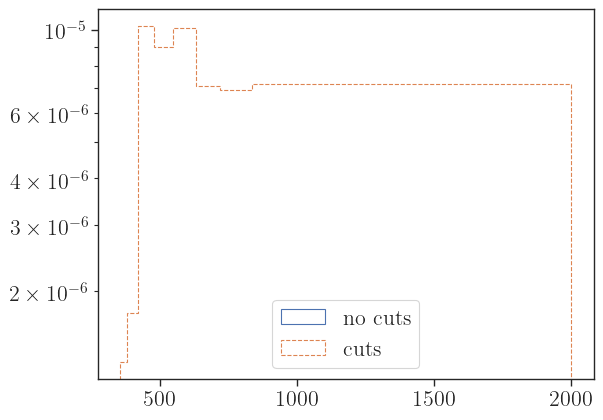

In [32]:
atlas_bins = np.array([355.0,381.0,420.0,478.0,549.0,633.0,720.0,836.0,2000.0])
plt.hist(d['pT'],weights=d['weights'],bins=atlas_bins,label='no cuts',histtype='step')
plt.hist(dATLAS['pTh'],weights=dATLAS['weights'],bins=atlas_bins,label='cuts',histtype='step',linestyle='dashed')
plt.yscale('log')
plt.legend()
plt.show()

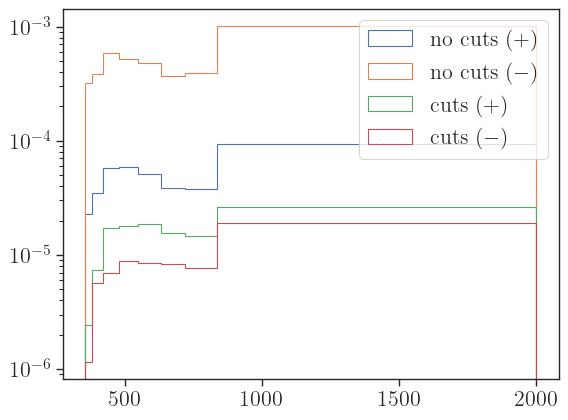

In [44]:
atlas_bins = np.array([355.0,381.0,420.0,478.0,549.0,633.0,720.0,836.0,2000.0])
plt.hist(d['pT'][np.where(d['weights']>0)],weights=d['weights'][np.where(d['weights']>0)],bins=atlas_bins,label='no cuts ($+$)',histtype='step')
plt.hist(d['pT'][np.where(d['weights']<0)],weights=-d['weights'][np.where(d['weights']<0)],bins=atlas_bins,label='no cuts ($-$)',histtype='step')
plt.hist(dATLAS['pTh'][np.where(dATLAS['weights']>0)],weights=dATLAS['weights'][np.where(dATLAS['weights']>0)[0]],bins=atlas_bins,label='cuts ($+$)',histtype='step')
plt.hist(dATLAS['pTh'][np.where(dATLAS['weights']<0)],weights=-dATLAS['weights'][np.where(dATLAS['weights']<0)[0]],bins=atlas_bins,label='cuts ($-$)',histtype='step')

plt.yscale('log')
plt.legend()
plt.show()

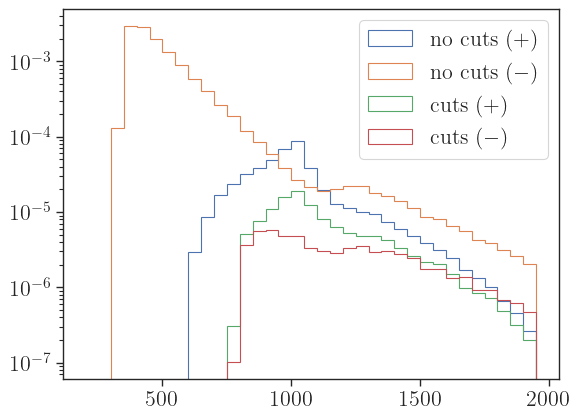

In [46]:
bins = np.arange(200.,2000.,50.)
plt.hist(d['mTT'][np.where(d['weights']>0)],weights=d['weights'][np.where(d['weights']>0)],bins=bins,label='no cuts ($+$)',histtype='step')
plt.hist(d['mTT'][np.where(d['weights']<0)],weights=-d['weights'][np.where(d['weights']<0)],bins=bins,label='no cuts ($-$)',histtype='step')
plt.hist(dATLAS['mTT'][np.where(dATLAS['weights']>0)],weights=dATLAS['weights'][np.where(dATLAS['weights']>0)[0]],bins=bins,label='cuts ($+$)',histtype='step')
plt.hist(dATLAS['mTT'][np.where(dATLAS['weights']<0)],weights=-dATLAS['weights'][np.where(dATLAS['weights']<0)[0]],bins=bins,label='cuts ($-$)',histtype='step')

plt.yscale('log')
plt.legend()
plt.show()

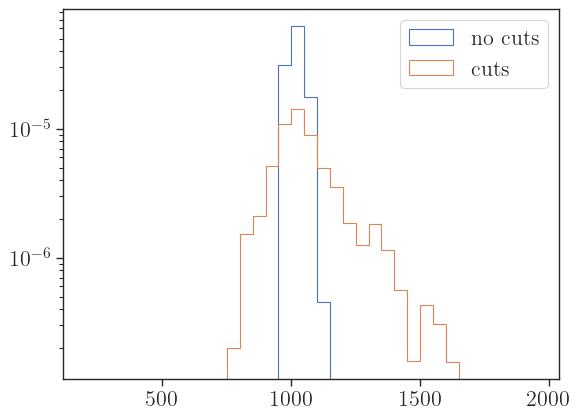

In [47]:
bins = np.arange(200.,2000.,50.)
plt.hist(d['mTT'],weights=d['weights'],bins=bins,label='no cuts',histtype='step')
plt.hist(dATLAS['mTT'],weights=dATLAS['weights'],bins=bins,label='cuts',histtype='step')

plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
# Add information to particles:
event = ev
for ptc in event.particles:
    ptc.daughters = []
    ptc.PID = int(ptc.id)
    p = np.sqrt(ptc.px**2 + ptc.py**2 + ptc.pz**2)
    ptc.PT = np.sqrt(ptc.px**2 + ptc.py**2)
    if not ptc.PT: # Only for incoming partons
        ptc.Eta = None
        ptc.Phi = None
    else:
        ptc.Eta = (1./2.)*np.log((p+ptc.pz)/(p-ptc.pz))        
        ptc.Phi = np.arctan2(ptc.py,ptc.px)
    ptc.Px = ptc.px
    ptc.Py = ptc.py
    ptc.Pz = ptc.pz
    ptc.E = ptc.e
    
for ptc in event.particles:
    for mom in ptc.mothers():
        mom.daughters.append(ptc)

# Get tops and their final decays:
tops = {}
topDecays = {}
for ptc in event.particles:        
    if abs(ptc.PID) == 6:
        tops[ptc.PID] = ptc # Store only the last top/anti-top            
        daughters = {d.PID : d for d in ptc.daughters}
        hasDaughters = [pid for pid,d in daughters.items() if d.daughters]
        while len(hasDaughters) > 0:
            for pid in hasDaughters:
                d = daughters.pop(pid)
                for dd in d.daughters:
                    daughters[dd.PID] = dd
            hasDaughters = [pid for pid,d in daughters.items() if d.daughters]
        topDecays[ptc.PID] = list(daughters.values())

# Select events with one lepton and one hadronic top:
topH = None
topLep = None
for topPID,daughters in topDecays.items():        
    dPIDs =  [abs(ptc.PID) for ptc in daughters]
    if len(dPIDs) != 3:
        error = True
        print('Error getting daughters:',dPIDs)
        break
    if not 5 in dPIDs:
        continue # Skip rare decays to W+c
    if (11 in dPIDs) or (13 in dPIDs):
        topLep = topPID
    elif max(dPIDs) <= 5:
        topH = topPID        

In [ ]:
for ptc in event.particles:
    print(ptc.PID)
print(topH,topLep)

In [ ]:
print(event.particles[2].id)
p1 = np.array([event.particles[2].px,event.particles[2].py,event.particles[2].pz,event.particles[2].e])
print(event.particles[7].id)
p2 = np.array([event.particles[7].px,event.particles[7].py,event.particles[7].pz,event.particles[7].e])
print('mTT=',np.sqrt((p1[-1]+p2[-1])**2-np.linalg.norm(p1[0:3]+p2[0:3])**2))
print(event.eventinfo.weight)

In [ ]:

distsATLAS = {f : getATLASdistributions(f) for f in selectedFiles}
dists = {f : getDistributions(f) for f in selectedFiles}


In [ ]:
# Randomly choose of the momenta to use
for f in dists:
    dists[f]['pT'] = []
    for i,pt1 in enumerate(dists[f]['pT1']):
        pt2 = dists[f]['pT2'][i]
        dists[f]['pT'].append(random.choice([pt1,pt2]))
    dists[f]['pT'] = np.array(dists[f]['pT'])
        

In [ ]:
bins = np.array([355.0,381.0,420.0,478.0,549.0,633.0,720.0,836.0,2000.0])
plt.figure(figsize=(10,6))
for f,res in dists.items():
    process = fileData[f]['process']
    model = fileData[f]['model']
    if 'SM' in model:
        continue
    # print(pTdists[f])
    label = r'%s (%s)' %(process,model)
    # print(label,'total weight=',sum(res['weights']),'weight (cuts) = ',sum(distsATLAS[f]['weights']))
    # print(distsATLAS[f]['weights'].max(),distsATLAS[f]['weights'].min())
    # print(res['weights'].max(),res['weights'].min())
    # print('\n')
    plt.hist(distsATLAS[f]['pTh'],weights=distsATLAS[f]['weights'],bins=bins,label=label+' - cuts',histtype='step',linewidth=2)
    plt.hist(res['pT'],weights=res['weights'],bins=bins,label=label,histtype='step',linewidth=2)
plt.legend()
plt.yscale('log')
plt.tight_layout()

In [ ]:
bins = np.arange(500.,1500.,10.0)
plt.figure(figsize=(10,6))
for f,res in dists.items():
    process = fileData[f]['process']
    model = fileData[f]['model']
    if 'SM' in model:
        continue
    # print(pTdists[f])
    label = r'%s (%s)' %(process,model)
    # print(label,'total weight=',sum(res['weights']),'weight (cuts) = ',sum(distsATLAS[f]['weights']))
    # print(distsATLAS[f]['weights'].max(),distsATLAS[f]['weights'].min())
    # print(res['weights'].max(),res['weights'].min())
    # print('\n')
    plt.hist(distsATLAS[f]['mTT'],weights=distsATLAS[f]['weights'],bins=bins,label=label+' - cuts',histtype='step',linewidth=2)
    plt.hist(res['mTT'],weights=res['weights'],bins=bins,label=label,histtype='step',linewidth=2)
plt.legend(loc=(1.1,0.6))
plt.yscale('log')
plt.tight_layout()

In [ ]:
for f,res in dists.items():    
    print('\n %s : %s' %(fileData[f]['model'],fileData[f]['process']))
    print('total xsec    = ',sum(res['weights']))
    print('MC events     = ',res['nevents'])

In [ ]:
# Define colors
colors = {f : sns.color_palette('Paired')[i+1] for i,f in enumerate(dists.keys())}

In [ ]:
# Define scale factor (new yDM value)
kscales = {f : 2.0 for f in smFiles} # The factor of 2 is to account for the 2 possible ttbar decays: (t -> jj, tbar->l nu) + (t -> l nu, tbar->jj)
yDM = 5.0
kscales.update({f : 2.0*(yDM/fileData[f]['(mST,mChi,mT,yDM)'][-1])**2 for f in bsmFiles})

In [ ]:
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)
bins = np.arange(500.,2200.,50.)

labels = []
pmodels = []
hists = []
histsErr = []
c = []
ks = []
for f in dists:
    process = fileData[f]['process']
    model = fileData[f]['model']
    mST,mChi,mT,_ = fileData[f]['(mST,mChi,mT,yDM)']
    
    kscale = kscales[f]
    pmodels.append(r'%s (%s)' %(process,model))
    label = pmodels[-1]
    labels.append(label)
    c.append(colors[f])
    ks.append(kscale)
    h,_ = np.histogram(dists[f]['mTT'],bins=bins,weights=kscale*dists[f]['weights'])
    hists.append(h)
    #Compute MC error
    hErr,_ = np.histogram(dists[f]['mTT'],bins=bins,weights=(kscale*dists[f]['weights'])**2)
    hErr = np.sqrt(hErr)    
    histsErr.append(hErr)
    

histsSM = [h for i,h in enumerate(hists) if 'SM' in labels[i]]    
histsErrSM = [h for i,h in enumerate(histsErr) if 'SM' in labels[i]]
labelsSM = [l for i,l in enumerate(labels) if 'SM' in labels[i]]    
cSM =  [cc for i,cc in enumerate(c) if 'SM' in labels[i]]    
axarr[0].hist([bins[:-1]]*len(histsSM),label=labelsSM,bins=bins,
                          weights=histsSM,alpha=0.3,density=True,
                          linewidth=0,color=cSM,stacked=True)

hSM = sum([hh for hh in histsSM[:]])
hErrSM = np.sqrt(sum([hh**2 for hh in histsErrSM[:]]))
labelsTrack = []
for i,h in enumerate(hists):
    if 'SM' in labels[i]:
        continue    
    axarr[0].hist(bins[:-1],weights=np.abs(h),label=labels[i],bins=bins,
                  color=c[i],alpha=1.0,histtype='step',density=True,
                  linewidth=3,fill=False,zorder=i,linestyle='solid')


    # Compute ratio (keeping negative and positive values)
    ratio = np.divide(h, hSM, out=np.zeros_like(h),where=hSM != 0)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    axarr[1].plot(x,y,linewidth=3.0,linestyle='solid', 
                          label=label,c=c[i])
    # Split curves into positive and negative segments
    # xy = np.array(list(zip(x,y)))    
    # for xySplit in np.split(xy,np.where(y[:-1]/y[1:]<0)[0]+1):
    #     if xySplit[0,1] < 0: # negative values
    #         ls = 'dashed'
    #         # label = pmodels[i]+r' ($<0$)'
    #         label = None
    #     else:
    #         ls = 'solid'
    #         # label = pmodels[i]+r' ($>0$)'
    #         label = None
            
    #     if label not in labelsTrack:
    #         labelsTrack.append(label)
    #     else:
    #         label = None
    #     axarr[1].plot(xySplit[:,0],np.abs(xySplit[:,1]),linewidth=3.0,linestyle=ls, 
    #                       label=label,c=c[i])

hEFT = sum([hh for i,hh in enumerate(hists) if 'EFT' in labels[i]])
hLoop = sum([hh for i,hh in enumerate(hists) if 'loop' in labels[i]])
ratioEFT = np.divide(hEFT, hSM, out=np.zeros_like(h),where=hSM != 0)
ratioLoop = np.divide(hLoop, hSM, out=np.zeros_like(h),where=hSM != 0)
# Total curve
# axarr[1].plot(bins[:-1],ratioEFT,linewidth=3.0,linestyle='solid',alpha=0.5,
                        #   label=label,c='gray')
# axarr[1].plot(bins[:-1],ratioLoop,linewidth=3.0,linestyle='solid', 
                        #   label=label,c='gray')


axarr[1].plot([],[],label=r'$\mathrm{Re}(\mathcal{M}_{\rm SM}^* \mathcal{M}_{\rm BSM}) > 0$',linewidth=3.0,linestyle='solid',c='black')
axarr[1].plot([],[],label=r'$\mathrm{Re}(\mathcal{M}_{\rm SM}^* \mathcal{M}_{\rm BSM}) < 0$',linewidth=3.0,linestyle='dashed',c='black')

    
axarr[0].set_yscale('log')
# axarr[0].set_ylim(1e-4,500)
# axarr[0].set_xticks(np.arange(0.,bins.max(),500))
axarr[0].set_xlim(bins.min(),bins.max())
axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[1].set_ylabel(r'$N_{BSM}/N_{SM}$')
axarr[1].set_ylim(-0.01,0.01)
# axarr[1].set_yscale('log')
# axarr[0].grid()
axarr[1].grid()


axarr[0].legend(framealpha=1.0,loc='upper right')
# axarr[1].legend(framealpha=1.0,loc='upper left')
axarr[0].set_title(r'$m_{T} = %1.0f$ GeV, $m_{\chi} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mST,mChi,yDM),
                   loc='left')
plt.savefig('mtt_mST%i_mChi%i_yDM_%i.png' %(int(mST),int(mChi),int(yDM)))
plt.show()

In [ ]:
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)
bins = np.arange(500.,2200.,100.)
bins = np.array([ 355.,  381.,  420.,  478.,  549.,  633.,  720.,  836., 2000.])

labels = []
pmodels = []
hists = []
histsErr = []
c = []
ks = []
for f in dists:
    process = fileData[f]['process']
    model = fileData[f]['model']
    mST,mChi,mT,_ = fileData[f]['(mST,mChi,mT,yDM)']
    
    kscale = kscales[f]
    pmodels.append(r'%s (%s)' %(process,model))
    label = pmodels[-1]
    labels.append(label)
    c.append(colors[f])
    ks.append(kscale)
    h,_ = np.histogram(dists[f]['pT'],bins=bins,weights=kscale*dists[f]['weights'])
    hists.append(h)
    #Compute MC error
    hErr,_ = np.histogram(dists[f]['pT'],bins=bins,weights=(kscale*dists[f]['weights'])**2)
    hErr = np.sqrt(hErr)    
    histsErr.append(hErr)
    

histsSM = [h for i,h in enumerate(hists) if 'SM' in labels[i]]    
histsErrSM = [h for i,h in enumerate(histsErr) if 'SM' in labels[i]]
labelsSM = [l for i,l in enumerate(labels) if 'SM' in labels[i]]    
cSM =  [cc for i,cc in enumerate(c) if 'SM' in labels[i]]    
axarr[0].hist([bins[:-1]]*len(histsSM),label=labelsSM,bins=bins,
                          weights=histsSM,alpha=0.3,density=True,
                          linewidth=0,color=cSM,stacked=True)

hSM = sum([hh for hh in histsSM[:]])
hErrSM = np.sqrt(sum([hh**2 for hh in histsErrSM[:]]))
labelsTrack = []
for i,h in enumerate(hists):
    if 'SM' in labels[i]:
        continue    
    axarr[0].hist(bins[:-1],weights=np.abs(h),label=labels[i],bins=bins,
                  color=c[i],alpha=1.0,histtype='step',density=True,
                  linewidth=3,fill=False,zorder=i,linestyle='solid')


    # Compute ratio (keeping negative and positive values)
    ratio = np.divide(h, hSM, out=np.zeros_like(h),where=hSM != 0)
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio  
    axarr[1].plot(x,y,linewidth=3.0,linestyle='solid', 
                          label=label,c=c[i])
    # Split curves into positive and negative segments
    # xy = np.array(list(zip(x,y)))    
    # for xySplit in np.split(xy,np.where(y[:-1]/y[1:]<0)[0]+1):
    #     if xySplit[0,1] < 0: # negative values
    #         ls = 'dashed'
    #         # label = pmodels[i]+r' ($<0$)'
    #         label = None
    #     else:
    #         ls = 'solid'
    #         # label = pmodels[i]+r' ($>0$)'
    #         label = None
            
    #     if label not in labelsTrack:
    #         labelsTrack.append(label)
    #     else:
    #         label = None
    #     axarr[1].plot(xySplit[:,0],np.abs(xySplit[:,1]),linewidth=3.0,linestyle=ls, 
    #                       label=label,c=c[i])

hEFT = sum([hh for i,hh in enumerate(hists) if 'EFT' in labels[i]])
hLoop = sum([hh for i,hh in enumerate(hists) if 'loop' in labels[i]])
ratioEFT = np.divide(hEFT, hSM, out=np.zeros_like(h),where=hSM != 0)
ratioLoop = np.divide(hLoop, hSM, out=np.zeros_like(h),where=hSM != 0)
# Total curve
# axarr[1].plot(bins[:-1],ratioEFT,linewidth=3.0,linestyle='solid',alpha=0.5,
                        #   label=label,c='gray')
# axarr[1].plot(bins[:-1],ratioLoop,linewidth=3.0,linestyle='solid', 
                        #   label=label,c='gray')


axarr[1].plot([],[],label=r'$\mathrm{Re}(\mathcal{M}_{\rm SM}^* \mathcal{M}_{\rm BSM}) > 0$',linewidth=3.0,linestyle='solid',c='black')
axarr[1].plot([],[],label=r'$\mathrm{Re}(\mathcal{M}_{\rm SM}^* \mathcal{M}_{\rm BSM}) < 0$',linewidth=3.0,linestyle='dashed',c='black')

    
axarr[0].set_yscale('log')
# axarr[0].set_ylim(1e-4,500)
# axarr[0].set_xticks(np.arange(0.,bins.max(),500))
axarr[0].set_xlim(bins.min(),bins.max())
axarr[1].set_xlabel(r'$p_T(t)$ (GeV)')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[1].set_ylabel(r'$N_{BSM}/N_{SM}$')
# axarr[1].set_ylim(-0.005,0.002)
# axarr[1].set_yscale('log')
# axarr[0].grid()
axarr[1].grid()


axarr[0].legend(framealpha=1.0,loc='upper right')
# axarr[1].legend(framealpha=1.0,loc='upper left')
axarr[0].set_title(r'$m_{T} = %1.0f$ GeV, $m_{\chi} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mST,mChi,yDM),
                   loc='left')
plt.savefig('pTt_mST%i_mChi%i_yDM_%i.png' %(int(mST),int(mChi),int(yDM)))
plt.show()